In [169]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread("C:\\Users\\yagnapraveenm\\Desktop\\praveen\\praveen5.jpg",cv.IMREAD_GRAYSCALE) # queryImage

img2 = cv.imread("C:\\Users\\yagnapraveenm\\Desktop\\praveen\\low.png",cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create(nfeatures =1000,
nOctaveLayers = 3,
contrastThreshold = 0.04,
edgeThreshold = 10,
sigma = 1.6)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance >0.90*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Uploaded image of low Brightness

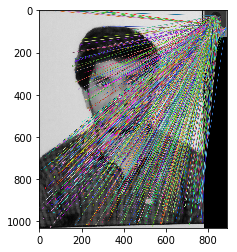

(<matplotlib.image.AxesImage at 0x23d5699ba8>, None)

In [170]:
plt.imshow(img3),plt.show()

In [172]:
if len(good) > 500:
    print("matched")
else:
    print("mismatched")

matched
